# Importing the necessary modules.

In [ ]:
# To work with numpy arrays.
import numpy as np 

# To create the convolution neural network
import keras 

# To provide with the name of the images.
import glob

# To read rgb values of images.
import cv2

# To resize images.
from resizeimage import resizeimage

# To open the image so it can be resized.
from PIL import Image

# To plot images and graphs
import matplotlib.pyplot as plt
%matplotlib inline

# To create the training, testing and validation datasets from a single dataset.
from sklearn.model_selection import train_test_split

# To create the neural network 
from keras.models import Sequential

# To add hidden layers as per requirements
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# To call the 
from keras.callbacks import ModelCheckpoint

ModuleNotFoundError: No module named 'cv2'

# Resizing the images.

The cell below will resize the images to a resolution of 100x100 pixels (without maintaining the ascpect ratio). To do so, the function resize of the module resize is being used. The resized images will be stored in a different folder, and they will be named as the number at which they were resized. glob is used to provide every file with a .jpg extension in the folders.

In [ ]:
x=[]
y=[]

# Converting the daisy images to 100x100 pixels.

daisy_images=glob.glob('./flowers/daisy/*.jpg')

i=1 
for image in daisy_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('./flowers/daisy_100x100/'+str(i)+'.jpg')
    i=i+1
   
# Converting dandelion images to 100x100 pixels.   

dandelion_images=glob.glob('./flowers/dandelion/*.jpg')

i=1 
for image in dandelion_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('./flowers/dandelion_100x100/'+str(i)+'.jpg')
    i=i+1
    
# Converting rose images to 100x100 pixels.  

rose_images=glob.glob('./flowers/rose/*.jpg')

i=1 
for image in rose_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('./flowers/rose_100x100/'+str(i)+'.jpg')
    i=i+1    
    
# Converting sunflower images to 100x100 pixels.   

sunflower_images=glob.glob('./flowers/sunflower/*.jpg')

i=1 
for image in sunflower_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('./flowers/sunflower_100x100/'+str(i)+'.jpg')
    i=i+1

# Converting tulip images to 100x100 pixels.    
    
tulip_images=glob.glob('./flowers/tulip/*.jpg')

i=1 
for image in tulip_images :
    open_image=Image.open(image)
    new_image=open_image.resize((100,100))
    new_image.save('./flowers/tulip_100x100/'+str(i)+'.jpg')
    i=i+1 

# Opening the resized images.

The resized images will opened in this cell. To open the resized images imread function of the module cv2(opencv) is being used. The rgb values which are in an array of 100x100x3 will be appended to list of features

In [ ]:
# Opening images (This cell will only be functional only if
# the images have been rescaled to and saved in the folders of the same name)

x=[]
y=[]

# Opening the daisy images and storing the rgb values in a list

daisy_images_100x100=glob.glob('./flowers/daisy_100x100/*.jpg')

i=1 
for image in daisy_images_100x100 :
    img=cv2.imread('./flowers/daisy_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(0)
    i=i+1
   
# Opening the dandelion images and storing the rgb values in a list  

dandelion_images_100x100=glob.glob('./flowers/dandelion_100x100/*.jpg')

i=1 
for image in dandelion_images_100x100 :
    img=cv2.imread('./flowers/dandelion_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(1)
    i=i+1
    
# Opening the daisy images and storing the rgb values in a list   

rose_images_100x100=glob.glob('./flowers/rose_100x100/*.jpg')

i=1 
for image in rose_images_100x100 :
    img=cv2.imread('./flowers/rose_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(2)
    i=i+1    
    
# Opening the daisy images and storing the rgb values in a list   

sunflower_images_100x100=glob.glob('./flowers/sunflower_100x100/*.jpg')

i=1 
for image in sunflower_images_100x100 :
    img=cv2.imread('./flowers/sunflower_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(3)
    i=i+1

# Opening the daisy images and storing the rgb values in a list    
    
tulip_images_100x100=glob.glob('./flowers/tulip_100x100/*.jpg')

i=1 
for image in tulip_images_100x100 :
    img=cv2.imread('./flowers/tulip_100x100/'+str(i)+'.jpg')
    x.append(img)
    y.append(4)
    i=i+1 

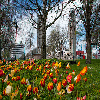

In [ ]:
# An exaple of the resized image

new_image

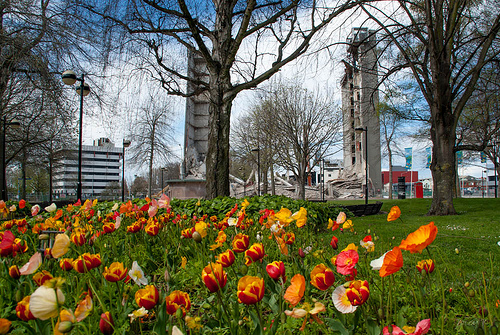

In [ ]:
# An example of the orignal image
open_image

In [ ]:
# Displaying the rgb values of the images stored in the list x 

x

[array([[[145, 143, 143],
         [146, 144, 144],
         [148, 146, 146],
         ...,
         [153, 152, 154],
         [149, 148, 150],
         [156, 155, 157]],
 
        [[135, 133, 133],
         [141, 139, 139],
         [150, 148, 148],
         ...,
         [155, 154, 156],
         [152, 151, 153],
         [154, 153, 155]],
 
        [[131, 131, 131],
         [139, 139, 139],
         [151, 151, 151],
         ...,
         [157, 156, 158],
         [153, 152, 154],
         [147, 146, 148]],
 
        ...,
 
        [[ 21,  42,  40],
         [ 25,  46,  44],
         [ 30,  46,  45],
         ...,
         [126, 127, 131],
         [123, 124, 128],
         [122, 123, 127]],
 
        [[ 23,  44,  42],
         [ 27,  48,  46],
         [ 31,  47,  46],
         ...,
         [127, 128, 132],
         [125, 126, 130],
         [124, 125, 129]],
 
        [[ 24,  45,  43],
         [ 29,  50,  48],
         [ 33,  49,  48],
         ...,
         [129, 130, 134],
  

### One-hot encoding the labels

This cell uses to_categorical() function to convert class vectors to a binary matrix eg. for a class vector [0,1,2] to array[(1,0,0), (0,1,0), (0,0,1)] 

In [ ]:
y=keras.utils.to_categorical(y)


### Creating the features to numpy array.

The function stack converts a list of 3-D arrays to a 4-D array, and then the values are scaled between 0 and 1 by diving each value by 255. From now on we will use the variable x_new as features(variable x will nt be used anymore)

In [ ]:
x_new=np.stack(x,axis=0)
x_new=x_new/255
#x_new

# Creating training,testing and validation datasets

In [ ]:
# Creating training and testing dataset
# Changed x --> x_new

x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=0.3,random_state=42)

In [ ]:
# Creating testing and validaton datasets

x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

# Creating the model.

In [ ]:
# Defining the neural network

nn=Sequential()

nn.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',input_shape=(100, 100, 3)))
nn.add(MaxPooling2D(pool_size=2))
nn.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=2))
nn.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
nn.add(MaxPooling2D(pool_size=2))
#
nn.add(Dropout(0.3))
nn.add(Flatten())
nn.add(Dense(500, activation='relu'))
nn.add(Dropout(0.5))
nn.add(Dense(5, activation='softmax'))

nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
__________

# Compiling the model.

The loss function chosen is categorical_crossentropy and the optimizer is adam.

In [ ]:
# Compiling the model

nn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Training the neural network

In [ ]:
# Training the neural network   

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = nn.fit(x_train, y_train, batch_size=64,epochs=10,validation_data=(x_valid,y_valid), callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 3026 samples, validate on 649 samples
Epoch 1/10
 - 32s - loss: 1.3384 - acc: 0.4210 - val_loss: 1.1729 - val_acc: 0.4746

Epoch 00001: val_loss improved from inf to 1.17292, saving model to model.weights.best.hdf5
Epoch 2/10
 - 33s - loss: 1.0868 - acc: 0.5562 - val_loss: 1.0020 - val_acc: 0.6040

Epoch 00002: val_loss improved from 1.17292 to 1.00202, saving model to model.weights.best.hdf5
Epoch 3/10
 - 28s - loss: 0.9778 - acc: 0.6180 - val_loss: 0.9529 - val_acc: 0.5963

Epoch 00003: val_loss improved from 1.00202 to 0.95293, saving model to model.weights.best.hdf5
Epoch 4/10
 - 28s - loss: 0.8771 - acc: 0.6619 - val_loss: 0.8890 - val_acc: 0.6379

Epoch 00004: val_loss improved from 0.95293 to 0.88900, saving model to model.weights.best.hdf5
Epoch 5/10
 - 30s - loss: 0.8003 - acc: 0.6940 - val_loss: 0.8668 - val_acc: 0.6456

Epoch 00005: val_loss improved from 0.88900 to 0.86685, saving model to model.weights.best.hdf5
Epoch 6/10
 - 30s - loss: 0.7366 - acc: 0.7201 - val

### Loadinng the weights which yeilded the maximum accuracy on the validation dataset

In [ ]:
# load the weights that yielded the best validation accuracy
nn.load_weights('model.weights.best.hdf5')

# Testing the model on testing dataset.

In [ ]:
# Testing
score = nn.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6867283950617284


In [ ]:
# Defining the labels

labels=['Daisy','Dandelion','Rose','Sunflower','Tulip']

In [ ]:
# get predictions on the test set
y_hat = nn.predict(x_test)
y_hat

array([[2.7117644e-02, 3.3135068e-01, 3.0770756e-02, 4.7855800e-01,
        1.3220295e-01],
       [5.3575557e-02, 8.7745458e-01, 3.4013472e-02, 1.5521950e-02,
        1.9434541e-02],
       [3.0328937e-02, 4.7991384e-04, 5.5413979e-01, 9.0504921e-04,
        4.1414627e-01],
       ...,
       [1.9753557e-01, 7.0900953e-01, 4.9991727e-02, 1.8234214e-02,
        2.5228916e-02],
       [4.1271782e-05, 5.6844897e-07, 6.0010362e-01, 1.1309627e-06,
        3.9985338e-01],
       [5.3957361e-03, 1.4551289e-02, 1.5222413e-02, 9.4133466e-01,
        2.3495905e-02]], dtype=float32)

## Printing results for some random images.

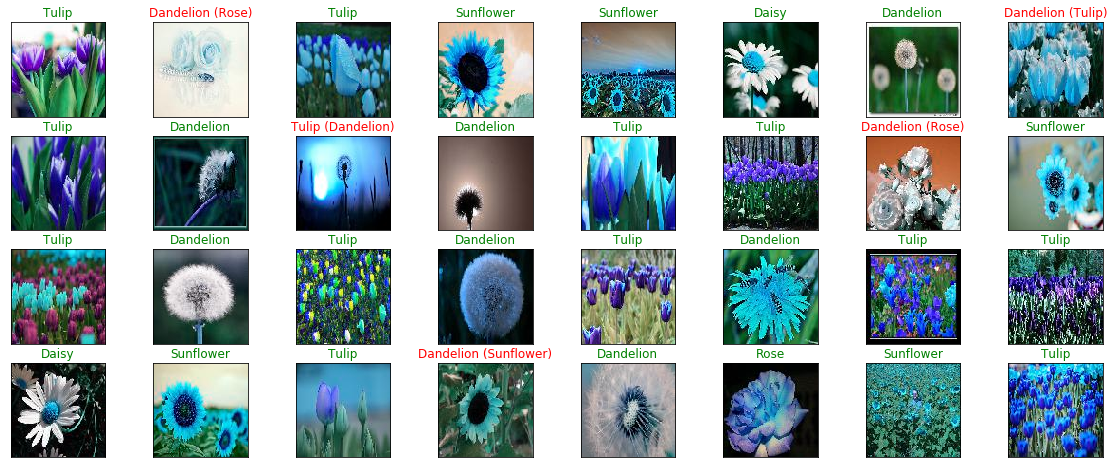

In [ ]:
# Plotting a random sample of test images, their predicted and actual labels

fig=plt.figure(figsize=(20, 8))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)) :
    ax=fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[idx])
    pred_idx=np.argmax(y_hat[idx])
    true_idx=np.argmax(y_test[idx])
    if pred_idx==true_idx :
        ax.set_title("{}".format(labels[pred_idx]),color=("green"))
    else :
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),color=("red"))

## Testing the model on images from the internet.

All the images are downloaded from Google Images, Each image

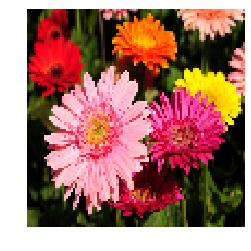

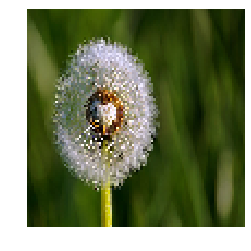

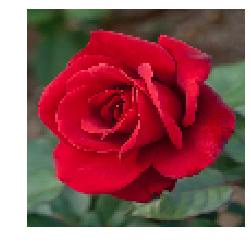

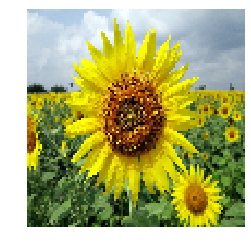

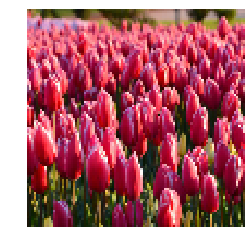

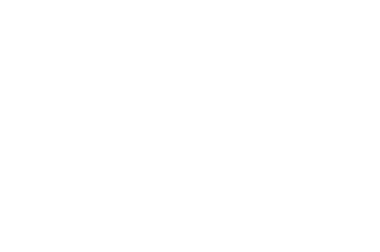

In [ ]:
test_images=[]

open_image=Image.open('daisy_from_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

open_image=Image.open('dandelion_from_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

open_image=Image.open('rose_from_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

open_image=Image.open('sunflower_from_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

open_image=Image.open('tulip_from_internet.jpg')
new_image=open_image.resize((100,100))
test_images.append(new_image)

test_features=np.stack(test_images)
test_features=test_features/255
y_pred=nn.predict(test_features)

plt.axis('off')
for ab in range(5) :
    plt.imshow(test_images[ab])
    plt.show()
    plt.axis('off')

In [ ]:
# Predicted labels for the test images downloaded from the internet.
# Actual labels : Daisy, Dandelion, Rose, Sunflower, Tulip

for ab in range(5) :
    print(labels[np.argmax(y_pred[ab])])

Daisy
Dandelion
Tulip
Sunflower
Tulip
